In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('Gas Leakage Dataset Final - Sheet1.csv')
df.head()

,Room_Size,Container_Volume_(cc),Room_Pressure_(psi),Room _Temp (C),Pressure_loss_(psi),Age of Pipe,CO Sensor value in MQ-9,Time_(sec)
0,300,44500,14.7,32,0.0100,20,348,54
1,100,25400,14.7,34,0.0860,19,516,180
2,500,22250,14.7,30,0.0200,35,485,45
3,150,19850,14.7,25,0.0185,41,415,78
4,285,11000,14.7,32,0.1120,7,625,26


In [58]:
df.insert(8,"Leak_Rate_(scc/m)","")
df.head()

,Room_Size,Container_Volume_(cc),Room_Pressure_(psi),Room _Temp (C),Pressure_loss_(psi),Age of Pipe,CO Sensor value in MQ-9,Time_(sec),Leak_Rate_(scc/m)
0,300,44500,14.7,32,0.0100,20,348,54,
1,100,25400,14.7,34,0.0860,19,516,180,
2,500,22250,14.7,30,0.0200,35,485,45,
3,150,19850,14.7,25,0.0185,41,415,78,
4,285,11000,14.7,32,0.1120,7,625,26,


In [59]:
data = pd.DataFrame()
data['numerator'] = df['Container_Volume_(cc)']*df['Pressure_loss_(psi)']
data['denominator'] = df['Time_(sec)']*df['Room_Pressure_(psi)']
df.loc[df['CO Sensor value in MQ-9'] >=212, 'Leak_Rate_(scc/m)'] = (data['numerator']/data['denominator'])*60
df.loc[df['CO Sensor value in MQ-9'] <212, 'Leak_Rate_(scc/m)'] = 0

In [61]:
result = [] 
for value in df["Leak_Rate_(scc/m)"]: 
    if value >= 30: 
        result.append("HIGHLY DANGEROUS") 
    elif value >= 5 and value <30: 
        result.append("DANGEROUS") 
    elif value >0 and value<5:
        result.append("ATTENTION REQUIRED") 
    else:
        result.append("SAFE")
       
df["Intensity"] = result    
df

,Room_Size,Container_Volume_(cc),Room_Pressure_(psi),Room _Temp (C),Pressure_loss_(psi),Age of Pipe,CO Sensor value in MQ-9,Time_(sec),Leak_Rate_(scc/m),Intensity
0,300,44500,14.7,32,0.0100,20,348,54,33.635676,HIGHLY DANGEROUS
1,100,25400,14.7,34,0.0860,19,516,180,49.532880,HIGHLY DANGEROUS
2,500,22250,14.7,30,0.0200,35,485,45,40.362812,HIGHLY DANGEROUS
3,150,19850,14.7,25,0.0185,41,415,78,19.216379,DANGEROUS
4,285,11000,14.7,32,0.1120,7,625,26,193.406593,HIGHLY DANGEROUS
5,350,41000,14.7,26,0.0150,15,200,150,0,SAFE
6,250,40840,14.7,33,0.0380,19,264,221,28.662296,DANGEROUS
7,400,50004,14.7,32,0.0250,28,198,287,0,SAFE
8,625,75400,14.7,20,0.0540,45,568,38,437.336198,HIGHLY DANGEROUS
9,280,5241,14.7,29,0.2100,26,521,541,8.303670,DANGEROUS


In [62]:
x= df.iloc[:,1:8].values
y = df.iloc[:,9].values

In [90]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 4, train_size = 0.85, random_state = 0)

In [91]:
np.unique(y,return_counts = True)

(array(['ATTENTION REQUIRED', 'DANGEROUS', 'HIGHLY DANGEROUS', 'SAFE'],
       dtype=object),
 array([ 5, 15, 19, 11], dtype=int64))

In [92]:
np.unique(ytrain, return_counts=True)

(array(['ATTENTION REQUIRED', 'DANGEROUS', 'HIGHLY DANGEROUS', 'SAFE'],
       dtype=object),
 array([ 5, 11, 15, 11], dtype=int64))

In [93]:
##Build the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
print(model)

KNeighborsClassifier(n_neighbors=3)


In [94]:
##Train the model
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [95]:
ypred = model.predict(xtest)
ypred

array(['HIGHLY DANGEROUS', 'DANGEROUS', 'DANGEROUS', 'HIGHLY DANGEROUS'],
      dtype=object)

In [96]:
ytest

array(['HIGHLY DANGEROUS', 'DANGEROUS', 'DANGEROUS', 'HIGHLY DANGEROUS'],
      dtype=object)

In [97]:
df = pd.DataFrame()
df["Actual Data"] = ytest
df["Predicted Data"] = ypred
df

,Actual Data,Predicted Data
0,HIGHLY DANGEROUS,HIGHLY DANGEROUS
1,DANGEROUS,DANGEROUS
2,DANGEROUS,DANGEROUS
3,HIGHLY DANGEROUS,HIGHLY DANGEROUS


In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[2, 0],
       [0, 2]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(ytest,ypred)

In [100]:
accu

1.0

In [101]:
accuracy = []
k_value = []
for k in range(35):
  if k != 0:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    accu = accuracy_score(ytest,ypred)
    accuracy.append(accu)
    k_value.append(k)

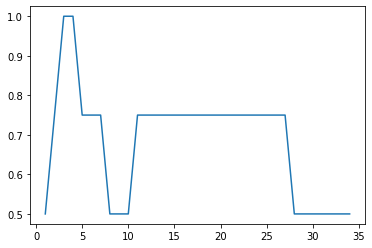

In [102]:
import matplotlib.pyplot as plt
plt.plot(k_value,accuracy)
plt.show()